Mini Project Data Science (Paris Housing) Target **price**

## 1. Data Preparation

In [ ]:
# Import Library

import pandas as pd

In [ ]:
# a. Import Data

df = pd.read_csv('4. Paris Housing.csv')
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


Data ini termasuk **Supervised Learning** karena dalam dataset sudah ada kolom target yaitu **price** (untuk regresi) dan **kategori** (untuk klasifikasi)

In [ ]:
# b. Informasi Type Kolom

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [ ]:
# c. Cek Duplikasi Baris

df.duplicated().sum()

np.int64(0)

Hasil dari Koding tersebut tidak ditemukan Data Duplikasi

In [ ]:
# d. Mendeskripsikan Data Numerik (round-> Menyederhanakan Desimal)

round(df.describe(), 2)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00,10000.00,10000.00,10000.0,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0,10000.0,10000.00,10000.00,10000.00,10000.0,10000.00,10000.00
mean,49870.13,50.36,0.51,0.5,50.28,50225.49,5.51,5.52,2005.49,0.5,0.5,5033.10,5028.01,553.12,0.5,4.99,4993447.53
std,28774.38,28.82,0.50,0.5,28.89,29006.68,2.87,2.86,9.31,0.5,0.5,2876.73,2894.33,262.05,0.5,3.18,2877424.11
min,89.00,1.00,0.00,0.0,1.00,3.00,1.00,1.00,1990.00,0.0,0.0,0.00,1.00,100.00,0.0,0.00,10313.50
25%,25098.50,25.00,0.00,0.0,25.00,24693.75,3.00,3.00,1997.00,0.0,0.0,2559.75,2512.00,327.75,0.0,2.00,2516401.95
50%,50105.50,50.00,1.00,0.0,50.00,50693.00,5.00,5.00,2005.50,0.0,0.0,5092.50,5045.00,554.00,1.0,5.00,5016180.30
75%,74609.75,75.00,1.00,1.0,76.00,75683.25,8.00,8.00,2014.00,1.0,1.0,7511.25,7540.50,777.25,1.0,8.00,7469092.45
max,99999.00,100.00,1.00,1.0,100.00,99953.00,10.00,10.00,2021.00,1.0,1.0,10000.00,10000.00,1000.00,1.0,10.00,10006771.20


In [ ]:
# e. Mengelompokan Data Bertype Numerik

numbers = df.select_dtypes(include = ['number']).columns

# Dipanggil
numbers

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [ ]:
# f. Mengambil Data Bertype Numerik

df = df[numbers]

## 2. Pemilihan Fiture

In [ ]:
# a. Memisahkan Variabel Bebas (X) dan Terikat (Y)

X = df.drop("price", axis = 1)
Y = df["price"]

<Axes: >

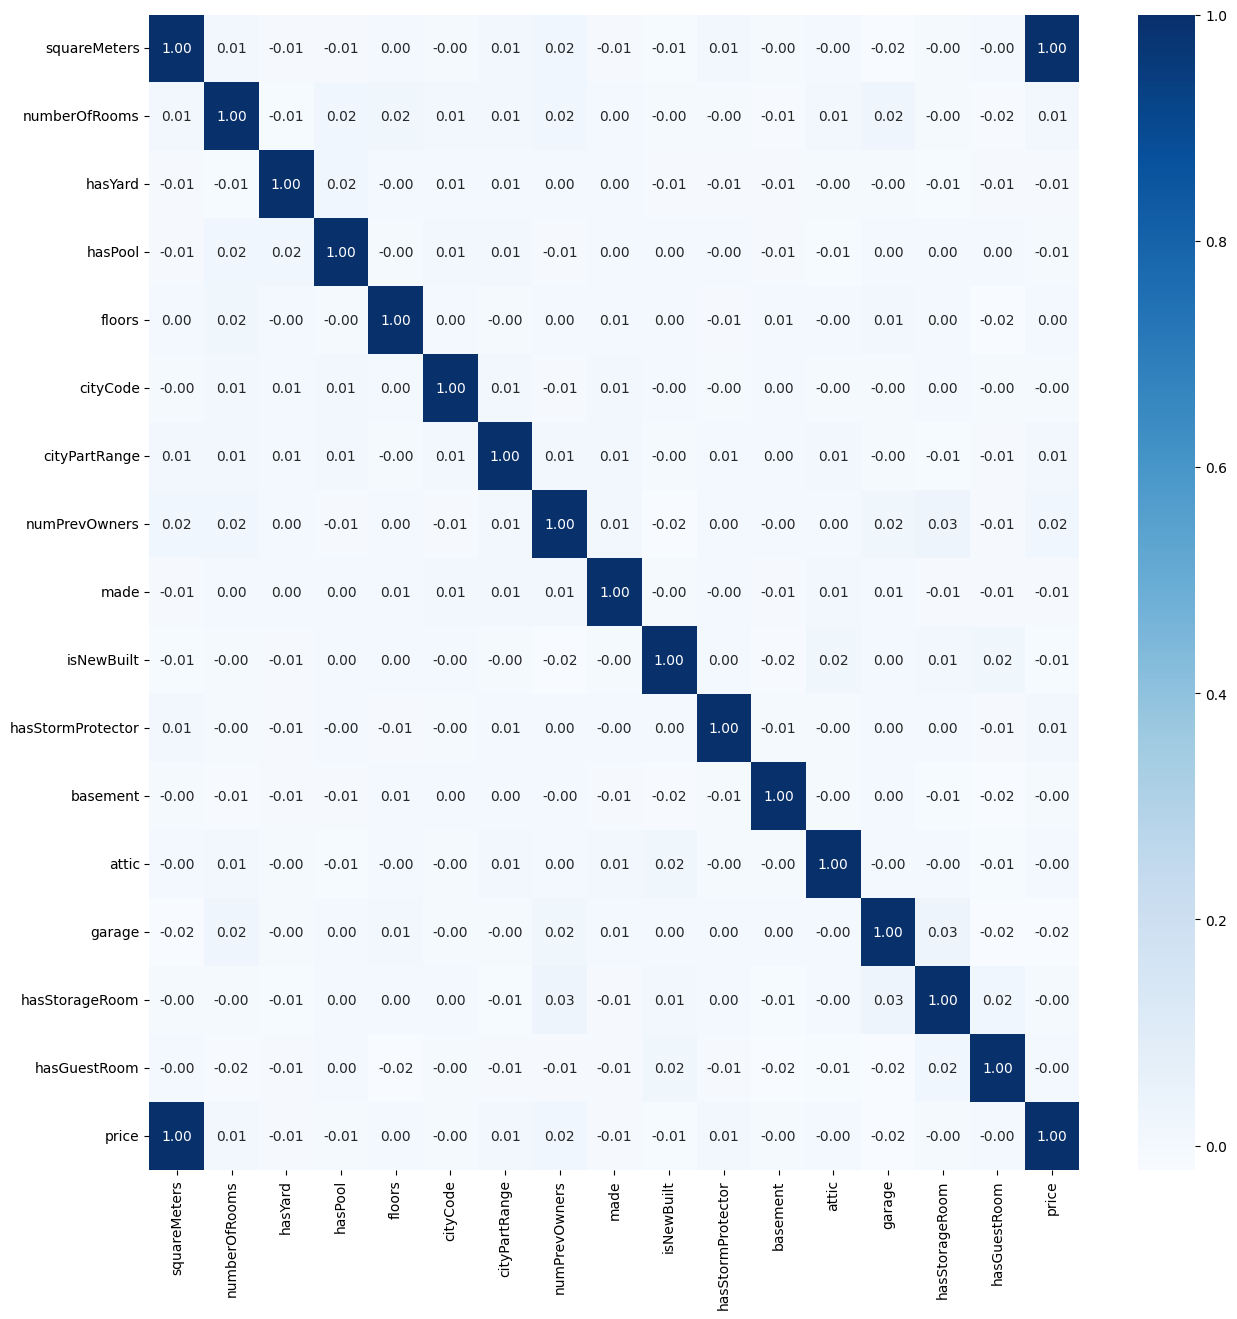

In [ ]:
# b. Correlation Heatmap untuk Melihat Korelasi Linear Kolom2 Numerik

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), cmap = 'Blues', annot = True, fmt = '.2f', annot_kws = {"size" : 10})

In [ ]:
# c. Mengecek Nilai VIP Setiap Kolom

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

# Dipanggil
vif_data

,feature,VIF
0,squareMeters,4.007454
1,numberOfRooms,4.064582
2,hasYard,2.037212
3,hasPool,1.989521
4,floors,4.034013
5,cityCode,4.000543
6,cityPartRange,4.685937
7,numPrevOwners,4.748642
8,made,38.092158
9,isNewBuilt,1.999563


Catatan
1. **Nilai VIF** aman jika **< 5**
2. Kolom Yang Nilai **VIF > 4** dan Nilai Korelasi **Heatmap > 0.8** **Dihapus**

In [ ]:
# d. Menghapus Kolom Price (Karena Target)

X = df.drop(columns = ['price'])

# Dipanggil
X.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4


## 3. Modelling

In [ ]:
# a. Membagi Data Latih dan Uji (80% Latih, 20% Uji)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

Menampilkan Variabel X (Train, Test)

In [ ]:
X_train.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
9254,81531,57,0,1,2,53236,7,1,1990,0,0,6192,9969,736,1,2
1561,78731,88,0,0,79,78649,7,6,1991,1,1,5914,6048,742,0,3
1670,78004,71,1,1,96,39708,10,10,1990,1,1,4527,2138,329,1,6
6087,15727,25,1,0,55,17489,1,7,2007,0,1,8350,1546,859,1,8
6669,3190,59,0,0,95,35955,6,6,2004,1,1,9709,6168,338,0,5


In [ ]:
X_test.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
6252,79553,7,1,0,61,35059,8,2,1996,1,1,3372,7603,896,1,1
4684,37047,79,1,1,87,57780,3,3,2019,1,0,5658,8216,160,0,5
1731,85476,36,1,0,44,83386,9,7,1992,0,1,6698,6043,692,1,7
4742,64209,30,1,1,55,53245,5,5,1992,1,0,9761,6148,525,1,0
4521,64550,89,1,1,68,4708,7,2,2019,0,0,1945,8269,495,0,10


Ditampilkan Variabel Y (Train, Test)

In [ ]:
Y_train.head()

,price
9254,8158198.0
1561,7878473.1
1670,7816750.0
6087,1577602.7
6669,322180.4


In [ ]:
Y_test.head()

,price
6252,7964369.6
4684,3713548.9
1731,8553019.2
4742,6428666.2
4521,6465184.9


In [ ]:
# b. Linear Regresion

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# c. Melihat Koefisien Masing2 Fitur

coef_df = pd.DataFrame({
    'feature' : X.columns,
    'coefficient' : model.coef_
})

# Melihat Nilai Intercept
print("Intercept : ", model.intercept_)

# Dipanggil
coef_df

Intercept :  6729.200551592745


,feature,coefficient
0,squareMeters,100.000082
1,numberOfRooms,0.273939
2,hasYard,2993.859264
3,hasPool,2993.106885
4,floors,54.465287
5,cityCode,-0.000960
6,cityPartRange,50.458555
7,numPrevOwners,2.821081
8,made,-3.187459
9,isNewBuilt,128.071127


## 4. Evaluasi

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# prediksi
Y_pred = model.predict(X_test)

# MAE
mae = mean_absolute_error(Y_test, Y_pred)

# MAPE (Rumus Manual)
mape = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100

# RMSE
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

# R2 Score
r2 = r2_score(Y_test, Y_pred)

# Dipanggil / Output
print("MAE  : ", mae)
print("MAPE : ", mape, "%")
print("RMSE : ", rmse)
print("R2   : ", r2)

MAE  :  1510.0341808542296
MAPE :  0.0945110130835154 %
RMSE :  1922.4225447645715
R2   :  0.9999995780555567


## 5. Normalisasi dengan StandardScaler

In [ ]:
# a. Normalisasi Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Dipanggil

In [ ]:
X_train_scaled

array([[ 1.1189976 ,  0.22279829, -1.01460667, ...,  0.70692003,
         1.00025003, -0.93962897],
       [ 1.02094519,  1.2987203 , -1.01460667, ...,  0.72979271,
        -0.99975003, -0.62348178],
       [ 0.99548658,  0.70869855,  0.98560362, ..., -0.84460972,
         1.00025003,  0.32495979],
       ...,
       [ 1.72058417,  0.60457706,  0.98560362, ..., -1.10764548,
         1.00025003, -0.30733459],
       [-1.13900939, -0.15898049,  0.98560362, ..., -0.77980381,
        -0.99975003, -0.93962897],
       [-1.60833026,  1.15989165,  0.98560362, ...,  1.0042648 ,
        -0.99975003,  1.58954856]])

In [ ]:
X_test_scaled

array([[ 1.04973057, -1.5125598 ,  0.98560362, ...,  1.31685802,
         1.00025003, -1.25577616],
       [-0.43877509,  0.98635584,  0.98560362, ..., -1.48885672,
        -0.99975003,  0.0088126 ],
       [ 1.25714645, -0.50605211,  0.98560362, ...,  0.53918709,
         1.00025003,  0.64110698],
       ...,
       [-1.05513956, -0.99195237,  0.98560362, ..., -0.60825875,
         1.00025003,  0.0088126 ],
       [-0.70684338, -0.29780914,  0.98560362, ..., -1.33637223,
         1.00025003,  1.27340137],
       [ 0.72731323, -1.13078102,  0.98560362, ...,  0.84415608,
         1.00025003,  0.0088126 ]])

## 6. Ridge

In [ ]:
# a. import Ridge

from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 1.0)
ridge.fit(X_train_scaled, Y_train)

Ridge()

In [ ]:
# b. Melihat Koefisien Masing2 Fitur

coef_df_ridge = pd.DataFrame({
    'feature' : X.columns,
    'coefficient' : ridge.coef_
})

# Dipanggil
coef_df_ridge

,feature,coefficient
0,squareMeters,2.855261e+06
1,numberOfRooms,1.031816e+01
2,hasYard,1.498089e+03
3,hasPool,1.490001e+03
4,floors,1.575096e+03
5,cityCode,-2.694732e+01
6,cityPartRange,1.477453e+02
7,numPrevOwners,1.348320e+01
8,made,-3.201764e+01
9,isNewBuilt,6.082121e+01


In [ ]:
# Prediksi
Y_pred = ridge.predict(X_test_scaled)

# MAE
mae_ridge = mean_absolute_error(Y_test, Y_pred)

# MAPE (Rumus Manual)
mape_ridge = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100

# RMSE
rmse_ridge = np.sqrt(mean_squared_error(Y_test, Y_pred))

# R2 Score
r2_ridge = ridge.score(X_test_scaled, Y_test)

# Dipanggil
print("MAE  : ", mae_ridge)
print("MAPE : ", mape_ridge, "%")
print("RMSE : ", rmse_ridge)
print("R2   : ", r2_ridge)

MAE  :  1542.1253243863955
MAPE :  0.10440953151812393 %
RMSE :  1956.0796707385362
R2   :  0.9999995631517009


## 7. Lasso

In [ ]:
# a. Import Lasso

from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 1.0)
lasso.fit(X_train_scaled, Y_train)

Lasso()

In [ ]:
# b. Melihat Koefisien Masing2 Fitur

coef_df_lasso = pd.DataFrame({
    'feature' : X.columns,
    'coefficient' : lasso.coef_
})

# Dipanggil
coef_df_lasso

,feature,coefficient
0,squareMeters,2.855617e+06
1,numberOfRooms,7.125984e+00
2,hasYard,1.495729e+03
3,hasPool,1.495584e+03
4,floors,1.575111e+03
5,cityCode,-2.672152e+01
6,cityPartRange,1.441769e+02
7,numPrevOwners,7.180212e+00
8,made,-2.866274e+01
9,isNewBuilt,6.304718e+01


In [ ]:
# Prediksi
Y_pred = lasso.predict(X_test_scaled)

# MAE
mae_lasso = mean_absolute_error(Y_test, Y_pred)

# MAPE (Manual Rumus)
mape_lasso = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100

# RMSE
rmse_lasso = np.sqrt(mean_squared_error(Y_test, Y_pred))

# R2 Score
r2_lasso = lasso.score(X_test_scaled, Y_test)

# Dipanggil
print("MAE  : ", mae_lasso)
print("MAPE : ", mape_lasso, "%")
print("RMSE : ", rmse_lasso)
print("R2   : ", r2_lasso)

MAE  :  1509.9166521815075
MAPE :  0.09449730364807357 %
RMSE :  1922.3392666928082
R2   :  0.9999995780921127


## 8. Memilih Nilai Alfa Terbaik

In [ ]:
# a. Membangun Model

alphas = np.logspace(-3, 3, 20) # Alpha dari 0.001 - 1000

ridge_rmse = []
lasso_rmse = []

for a in alphas :
  # Ridge
  ridge = Ridge(alpha = a , random_state = 42)
  ridge.fit(X_train_scaled, Y_train)
  Y_pred_ridge = ridge.predict(X_test_scaled)
  ridge_rmse.append(np.sqrt(mean_squared_error(Y_test, Y_pred_ridge)))

  # Lasso
  lasso = Lasso(alpha = a, max_iter = 10000, random_state = 42)
  lasso.fit(X_train_scaled, Y_train)
  Y_pred_lasso = lasso.predict(X_test_scaled)
  lasso_rmse.append(np.sqrt(mean_squared_error(Y_test, Y_pred_lasso)))

In [ ]:
# b. Validasi Dengan RMSE

best_alpha_ridge = alphas[np.argmin(ridge_rmse)]
best_rmse_ridge = min(ridge_rmse)

best_alpha_lasso = alphas[np.argmin(lasso_rmse)]
best_rmse_lasso = min(lasso_rmse)

print("Ridge Regression = Best Alpha : ", round(best_alpha_ridge, 3), " | RMSE : ", round(best_rmse_ridge, 3))
print("Lasso Regression = Best Alpha : ", round(best_alpha_lasso, 3), " | RMSE : ", round(best_rmse_lasso, 3))

Ridge Regression = Best Alpha :  0.018  | RMSE :  1922.4
Lasso Regression = Best Alpha :  6.158  | RMSE :  1922.055


## 9. Tunning HyperParameter

In [ ]:
from sklearn.model_selection import GridSearchCV

# Pada Ridge
ridge = Ridge()
#  dari 0.001 sampai 1000
alphas = np.logspace(-3, 3, 20)
param_grid = {'alpha' : alphas}

grid = GridSearchCV(ridge, param_grid, cv = 10, scoring = 'neg_mean_squared_error')
grid.fit(X_train_scaled, Y_train)

print("Best Alpha : ", grid.best_params_)
print("Best Score : ", grid.best_score_)

Best Alpha :  {'alpha': np.float64(0.001)}
Best Score :  -3591117.0082333796


In [ ]:
from sklearn.model_selection import GridSearchCV

# Pada Lasso
lasso = Lasso()
#  dari 0.001 sampai 1000
alphas = np.logspace(-3, 3, 20)
param_grid = {'alpha' : alphas}

grid = GridSearchCV(lasso, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid.fit(X_train_scaled, Y_train)

print("Best Alpha : ", grid.best_params_)
print("Best Score : ", grid.best_score_)

Best Alpha :  {'alpha': np.float64(2.976351441631316)}
Best Score :  -3590981.4444251717
